# Let's handle missing values on 'titanic dataset'

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df = sns.load_dataset('titanic')

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Remove values

In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Above we have `688 null values in 'deck'`, `177 in 'age'` and `2 in 'embarked' and 'embark_town'`, etc. 
After droping **null** values, rows we have left are:

In [18]:
df.dropna().shape

(182, 15)

#### After removing null values, we'll have only 182 rows remaining. So we can't remove rows here.   
- But we can remove ***column***, instead of rows.

In [ ]:
# inplace = True, would make permanent changes to this dataframe only
# df.dropna(axis=1, inplace=True)     

df.dropna(axis=1) # Will remove all columns containing any 'null' value

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


#### We can also remove specific column only.

In [ ]:
df.drop(['deck'], axis=1)
# 'deck' column will be removed.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Imputation of missing values:

### 1. Mean Value Imputation : 

<Axes: xlabel='age', ylabel='Count'>

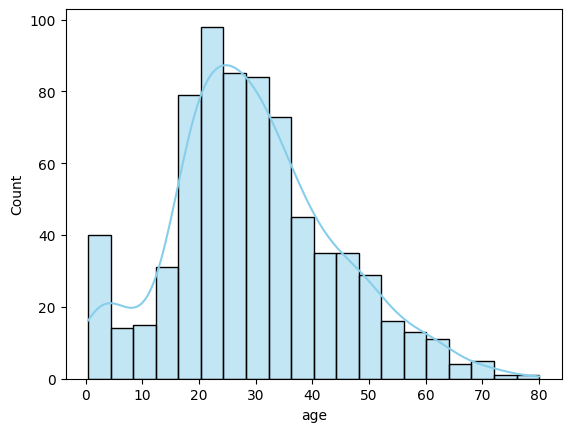

In [28]:
sns.histplot(df['age'], kde=True, color='skyblue')

In [31]:
df['mean_age'] = df['age'].fillna(df['age'].mean())

In [35]:
df[['mean_age', 'age']].sample(10)

,mean_age,age
300,29.699118,NaN
770,24.000000,24.0
739,29.699118,NaN
828,29.699118,NaN
353,25.000000,25.0
395,22.000000,22.0
351,29.699118,NaN
642,2.000000,2.0
625,61.000000,61.0
3,35.000000,35.0


#### Mean imputation works well when we have normally distributed data.

### 2. Median - Imputation : If we have outliers in the dataset

In [37]:
df['median_age'] = df['age'].fillna(df['age'].median())

df[['median_age', 'age']]

,median_age,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


### Mode Imputation : Cateorical values

In [47]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,mean_age,median_age
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [48]:
# let's find unique values inside 'emabarked' column
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [151]:
mode_value = df['embarked'].mode()[0]

df['embarked_mode'] = df['embarked'].fillna(mode_value)


In [ ]:
df[df['embarked'].isnull()] [['embarked', 'embarked_mode']]

,embarked,embarked_mode
61,NaN,S
829,NaN,S
